<a href="https://colab.research.google.com/github/satoshi-yamakawa/exp4_3/blob/3-reidai/exp4_3_reidai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

20000×1の情報ビット列生成

In [ ]:
import numpy as np
bit_num = 20000
m = np.random.randint(0, 2, (bit_num))

print("情報ビット列のサイズ→", m.size)

情報ビット列のサイズ→ 20000


金先生BPSK例題のSNR拡張Ver

BER_meas:  [0.         0.         0.08333333 0.         0.         0.        ]


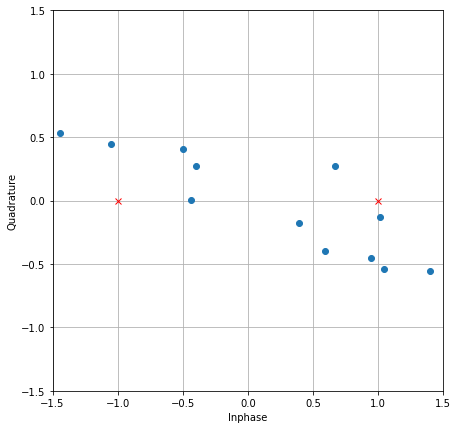

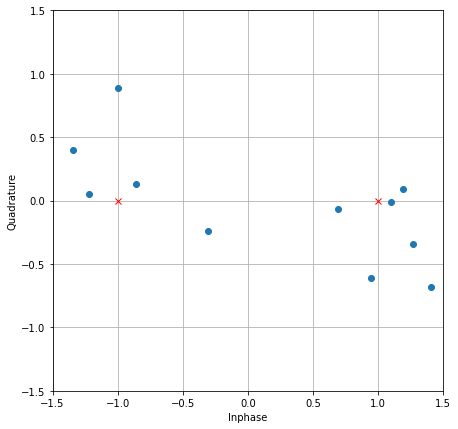

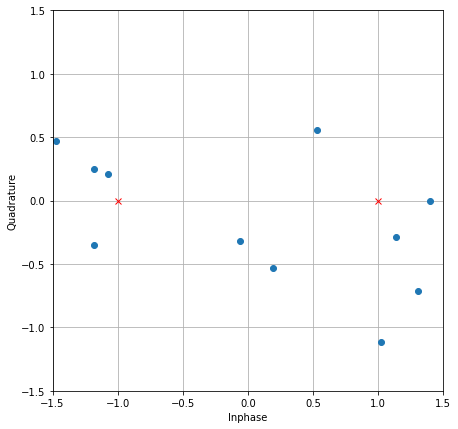

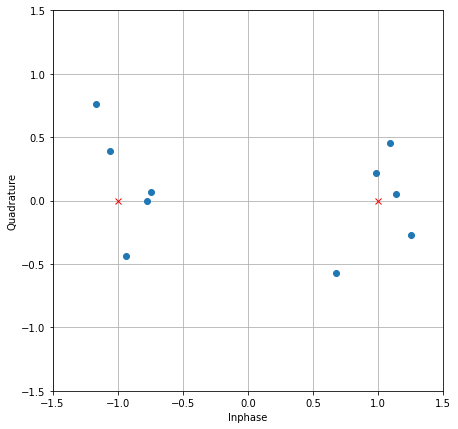

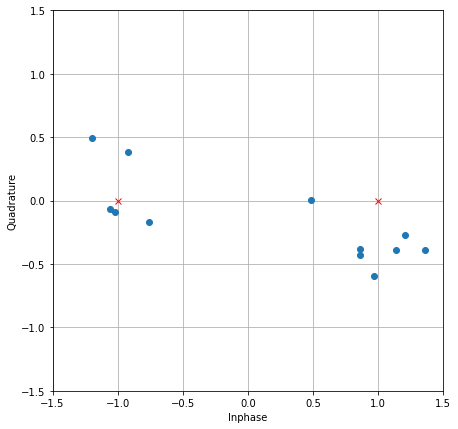

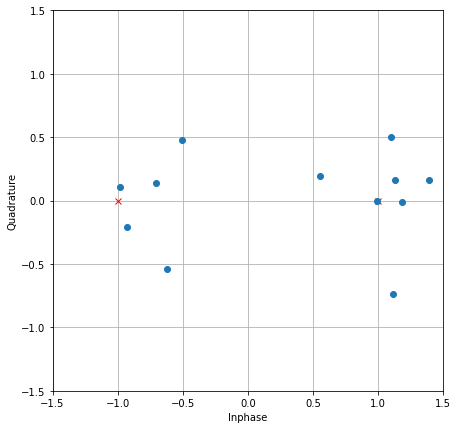

In [4]:
##################
# BPSK Modulation
##################

import numpy as np
import math
import matplotlib.pyplot as plt

m = np.array([1,0,1,1,0,1,1,1,0,0,0,1])      # ビット系列
M = round(m.shape[0])          # シンボル数（BPSK：1ビット/シンボル)

fc = 100;                 # 搬送波周波数 [Hz] 
R  = 100;                 # シンボルレート [symbols/sec]
T  = 1/R;                 # シンボル周期
Fs = R*10;                # サンプリング周波数（シンボル周期の10倍）
Ts = 1/Fs;                # サンプル周期

N  = round(T/Ts);         # シンボル当たりのサンプル数
mm = np.arange(M);
n  = np.arange(M*N);      
t  = n*Ts;                # 時間  
pi = math.pi;
car = np.exp(np.array(1j*2*pi*fc*t));  # 搬送波（1周期/シンボル）
g_t = np.ones(N);          # パルス整形フィルタ

# Modulation

uI = np.zeros(M);
uQ = np.zeros(M);
uI_t = [];
uQ_t = [];

for ii in range(M):
  if m[ii] == 0:
    ph = math.pi       # '0'
  else:
    ph = 0             # '1'            

  # 符号系列
  uI[ii] = math.cos(ph);
  uQ[ii] = math.sin(ph);
      
  # 基底帯域信号
  uI_t = np.hstack((uI_t, g_t*uI[ii]));
  uQ_t = np.hstack((uQ_t, g_t*uQ[ii]));

u   = uI_t+1j*uQ_t;     # 基底帯域信号
s_t = (u*car).real;     # 帯域信号

# De-Modulation

gamma_b_dB = np.array([-6,-3,0,3,6,9]);
gamma_b = 10**(gamma_b_dB/10);
SNR = 2/5*gamma_b;
SNRdB = 10*np.log10(SNR);

error_rate = np.zeros(len(SNR));

for iii in range(len(SNR)):
  rt = s_t + 10**(-SNR[iii]/20)*np.random.randn(M*N); #
  rI = rt*2*car.real;
  rQ = -rt*2*car.imag;
  r_uI = [];
  r_uQ = [];
  for ii in range(M):
      r_uI = np.append(r_uI, np.mean(rI[(ii*N):((ii+1)*N-1)]));
      r_uQ = np.append(r_uQ, np.mean(rQ[(ii*N):((ii+1)*N-1)]));

  fig = plt.figure(figsize=(7,7))
  ax = fig.add_subplot(111)
  ax.plot(-1, 0, 'xr')
  ax.plot(1, 0, 'xr')
  ax.plot(r_uI, r_uQ, 'o')
  ax.set_xlabel("Inphase")
  ax.set_ylabel("Quadrature")
  ax.set_xlim(-1.5,1.5)
  ax.set_ylim(-1.5,1.5)
  ax.grid("both")

  bitdat = [];
  for ii in range(M):
    if r_uI[ii] > 0:
      bitdat0 = 1       # '0'
    else:
      bitdat0 = 0       # '1'         
    bitdat = np.append(bitdat, bitdat0);

  error_rate[iii] = np.mean(m != bitdat);
print('BER_meas: ', error_rate);

In [5]:
print(SNRdB)

[-9.97940009 -6.97940009 -3.97940009 -0.97940009  2.02059991  5.02059991]
